In [1]:
import pandas as pd

df = pd.read_csv("troop_movements.csv")

In [57]:
print(df['empire_or_resistance'].value_counts())

empire_or_resistance
empire        518
resistance    482
Name: count, dtype: int64


In [23]:
print(df['homeworld'].value_counts())

homeworld
Ojom            34
Stewjon         32
Haruun Kal      30
Trandosha       29
Kalee           29
Mon Cala        28
Toydaria        28
Dagobah         27
Umbara          27
Alderaan        27
Aleen Minor     26
Mirial          25
Dathomir        25
Sullust         25
Ryloth          25
Concord Dawn    25
Kashyyyk        25
Eriadu          24
Iktotch         24
Tatooine        24
Iridonia        24
Muunilinst      23
Corellia        23
Glee Anselm     23
Serenno         23
Quermia         23
Tund            23
Tholoth         23
Vulpter         22
Dorin           22
Malastare       22
Bestine IV      22
Cerea           21
Rodia           20
Champala        20
Troiken         20
Zolan           20
Naboo           19
Socorro         18
Skako           17
Shili           17
Chandrila       16
Name: count, dtype: int64


In [24]:
print(df['unit_type'].value_counts())

unit_type
resistance_soldier    133
tie_silencer          131
stormtrooper          129
x-wing                129
at-at                 128
unknown               121
at-st                 118
tie_fighter           111
Name: count, dtype: int64


In [29]:
df['is_resistance'] = df['empire_or_resistance'].apply(lambda x: True if x == "resistance" else False)
print(df)

               timestamp  unit_id           unit_type empire_or_resistance  \
0    2025-07-08 10:23:34        1         tie_fighter           resistance   
1    2025-07-08 10:23:33        2        stormtrooper               empire   
2    2025-07-08 10:23:32        3               at-at           resistance   
3    2025-07-08 10:23:31        4               at-at           resistance   
4    2025-07-08 10:23:30        5             unknown               empire   
..                   ...      ...                 ...                  ...   
995  2025-07-08 10:06:59      996              x-wing           resistance   
996  2025-07-08 10:06:58      997         tie_fighter               empire   
997  2025-07-08 10:06:57      998              x-wing               empire   
998  2025-07-08 10:06:56      999  resistance_soldier               empire   
999  2025-07-08 10:06:55     1000  resistance_soldier               empire   

     location_x  location_y  destination_x  destination_y    ho

<BarContainer object of 2 artists>

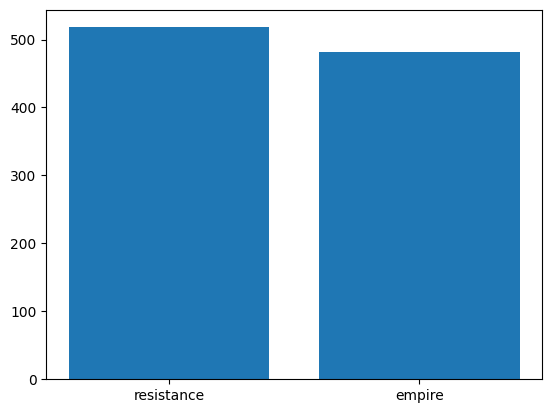

In [84]:
from matplotlib import pyplot as plt 

plt.bar(df['empire_or_resistance'].unique(), df['empire_or_resistance'].value_counts())

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#X = df[['homeworld', 'unit_type']]
y = df['is_resistance']


In [86]:
categorical_features = ['homeworld', 'unit_type']

X = pd.get_dummies(df[categorical_features])

In [81]:
dt = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.605


In [82]:
importances = dt.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'homeworld_Alderaan'),
  Text(1, 0, 'homeworld_Aleen Minor'),
  Text(2, 0, 'homeworld_Bestine IV'),
  Text(3, 0, 'homeworld_Cerea'),
  Text(4, 0, 'homeworld_Champala'),
  Text(5, 0, 'homeworld_Chandrila'),
  Text(6, 0, 'homeworld_Concord Dawn'),
  Text(7, 0, 'homeworld_Corellia'),
  Text(8, 0, 'homeworld_Dagobah'),
  Text(9, 0, 'homeworld_Dathomir'),
  Text(10, 0, 'homeworld_Dorin'),
  Text(11, 0, 'homeworld_Eriadu'),
  Text(12, 0, 'homeworld_Glee Anselm'),
  Text(13, 0, 'homeworld_Haruun Kal'),
  Text(14, 0, 'homeworld_Iktotch'),
  Text(15, 0, 'homeworld_Iridonia'),
  Text(16, 0, 'homeworld_Kalee'),
  Text(17, 0, 'homeworld_Kashyyyk'),
  Text(18, 0, 'homeworld_Malastare'),
  Text(19, 0,

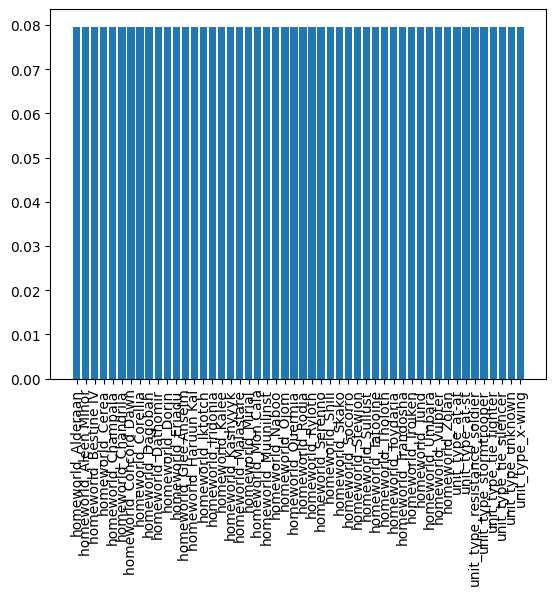

In [83]:
plt.pyplot.bar(feature_importances['Feature'], max(feature_importances['Importance'])) # make names vertica;l
plt.pyplot.xticks(rotation=90)